In [65]:
#Crimes.csv

In [66]:
#!pip install yellowbrick

In [67]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid',palette='rainbow')
from scipy.cluster import hierarchy
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [68]:
#Read The Dataset
df = pd.read_csv('https://raw.githubusercontent.com/KJanhavi2424/My-Datasets/main/crime_data.csv')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [69]:
data = df.drop(columns=['Unnamed: 0'])
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


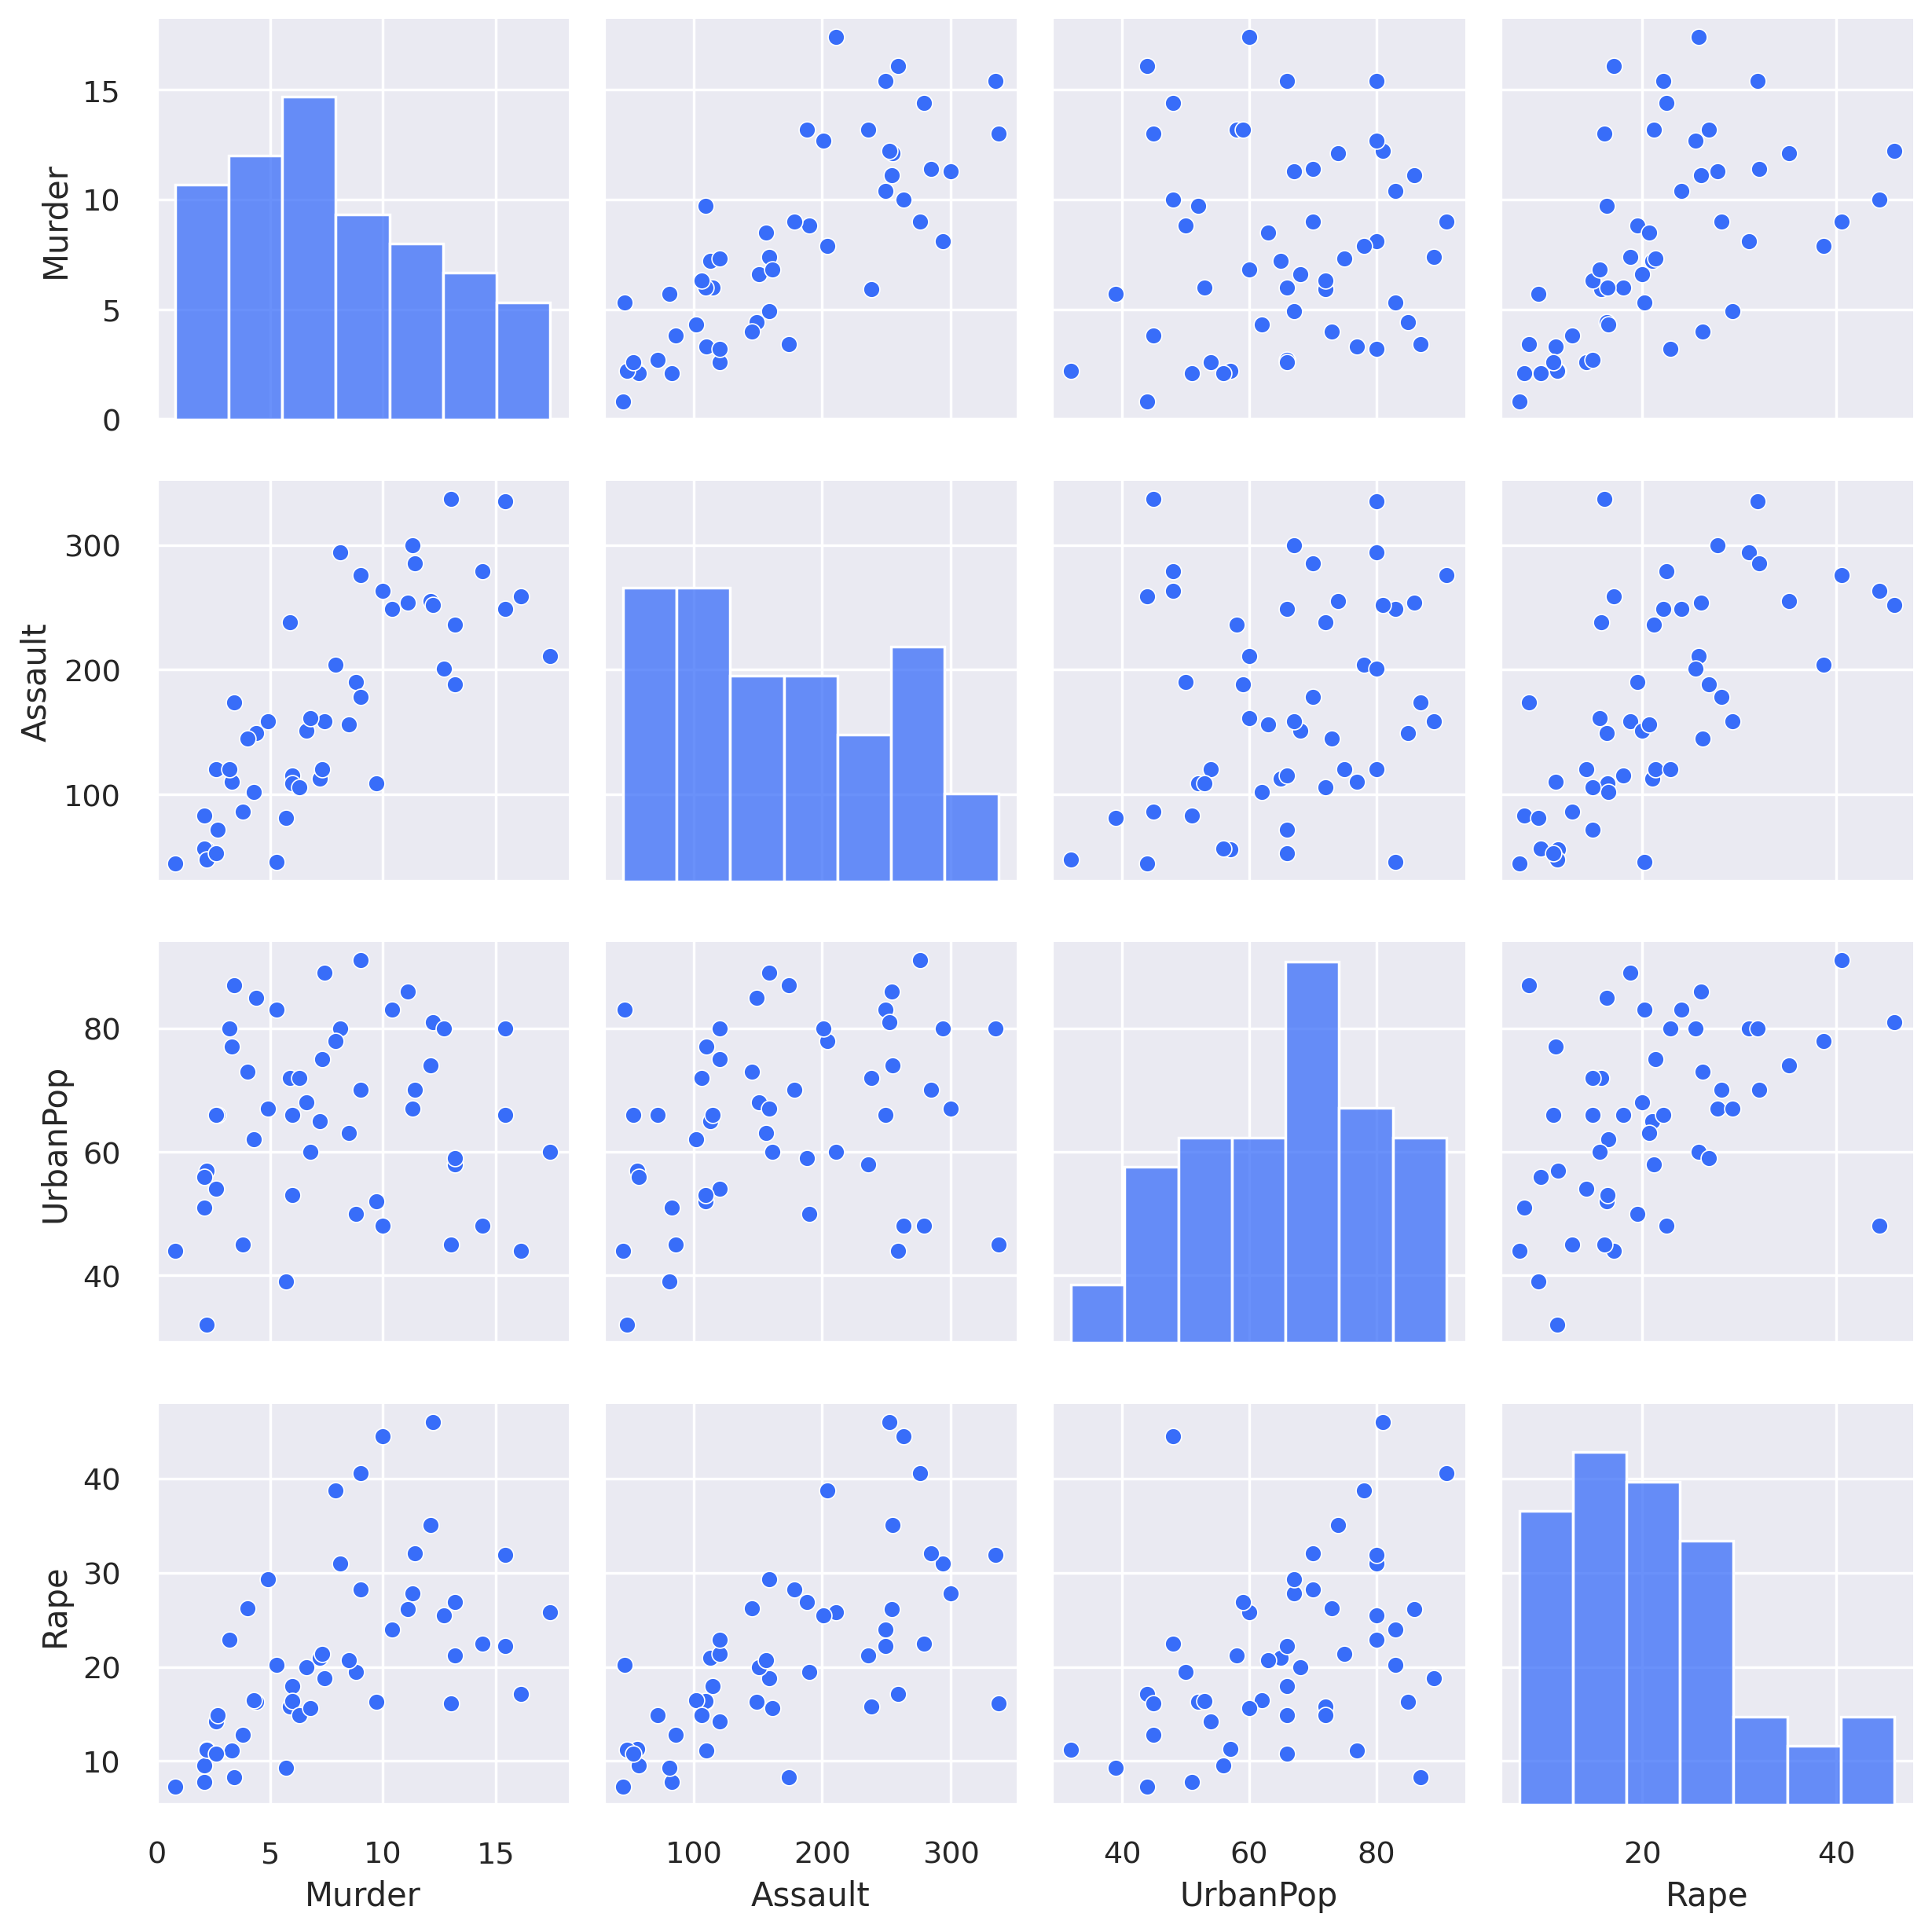

In [70]:
sns.pairplot(data)
plt.tight_layout()
plt.show()

In [71]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [73]:
sc = StandardScaler()
x = sc.fit_transform(data)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [74]:
#Hierarchical Clustering

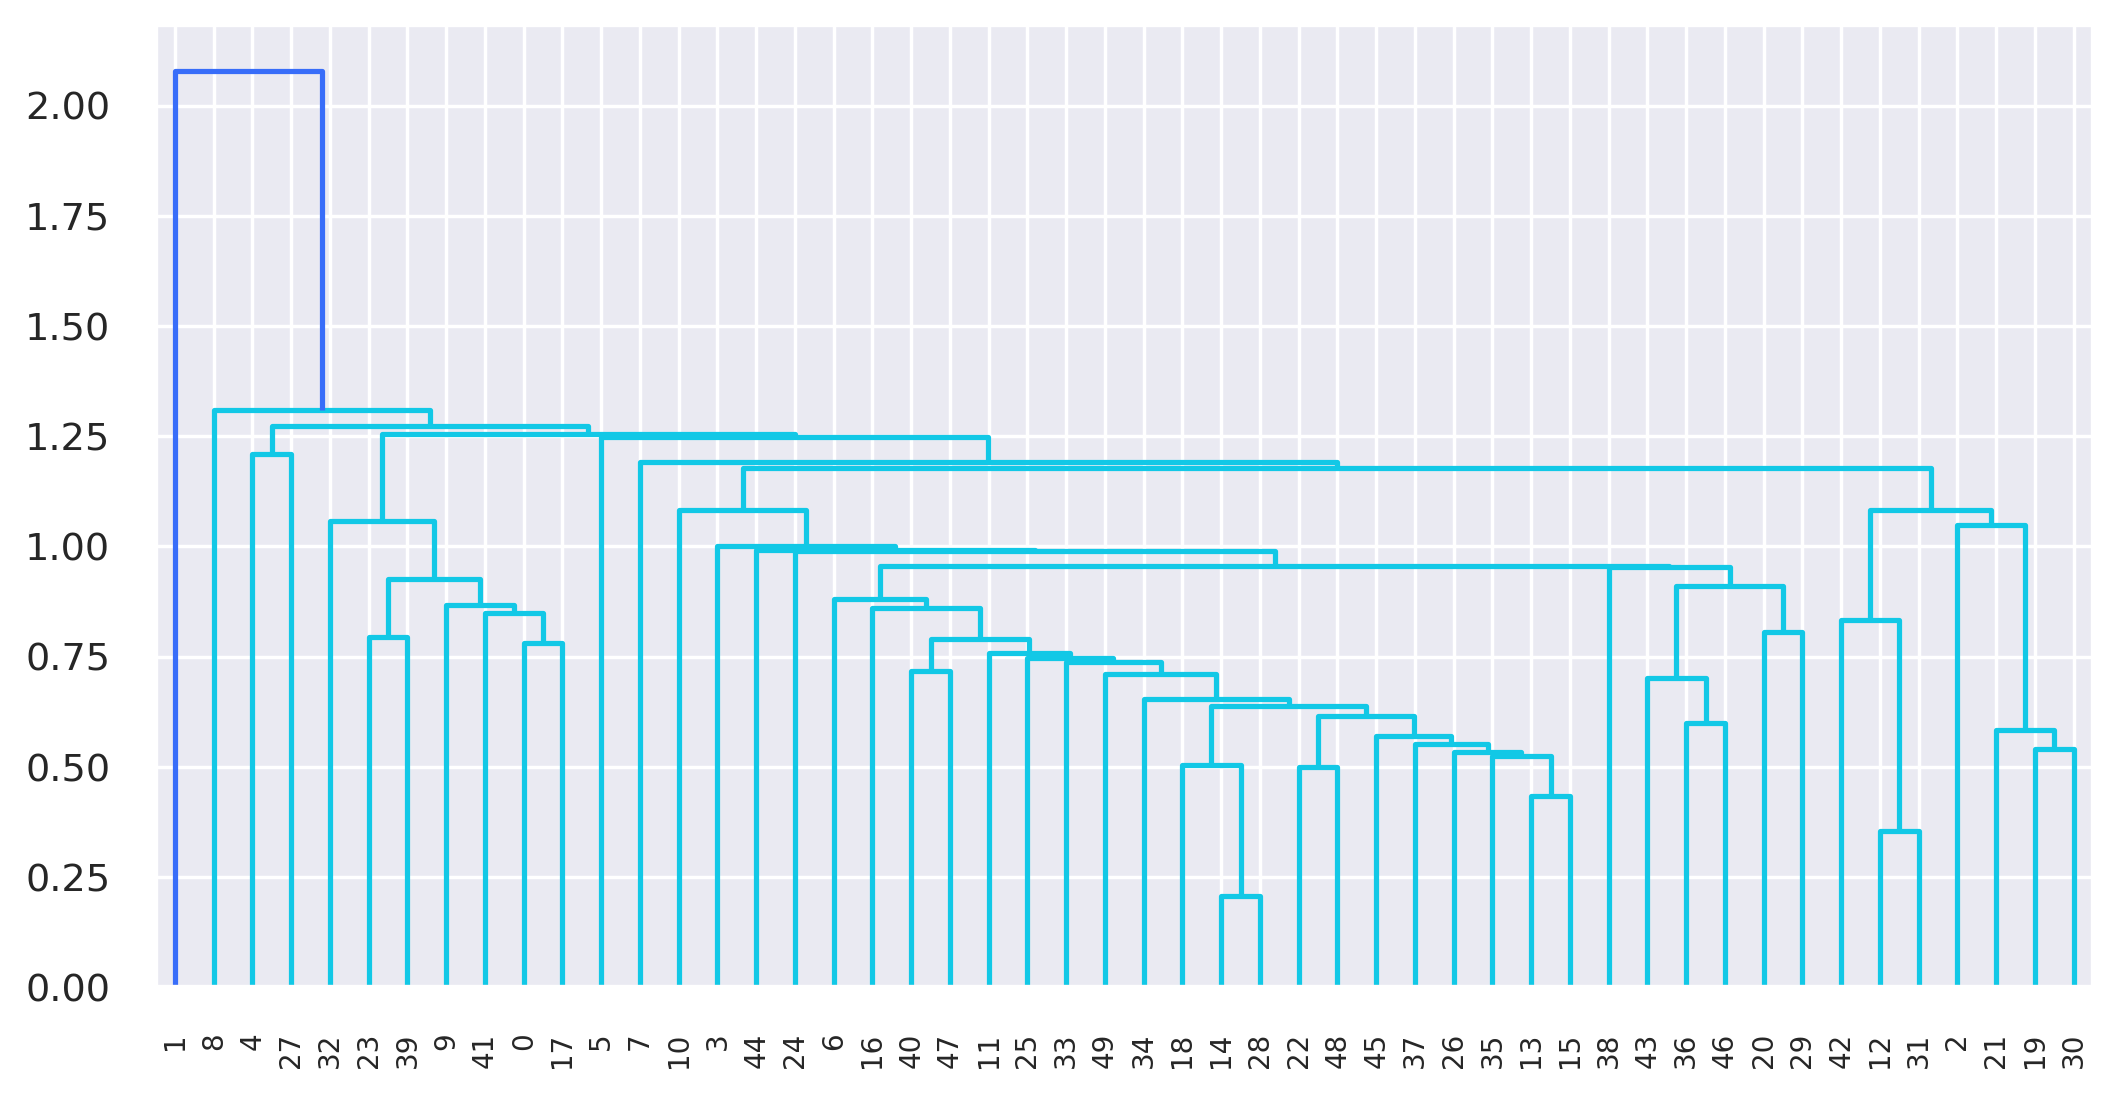

In [75]:
lk = hierarchy.linkage(x,method='single')
dendro = hierarchy.dendrogram(lk)

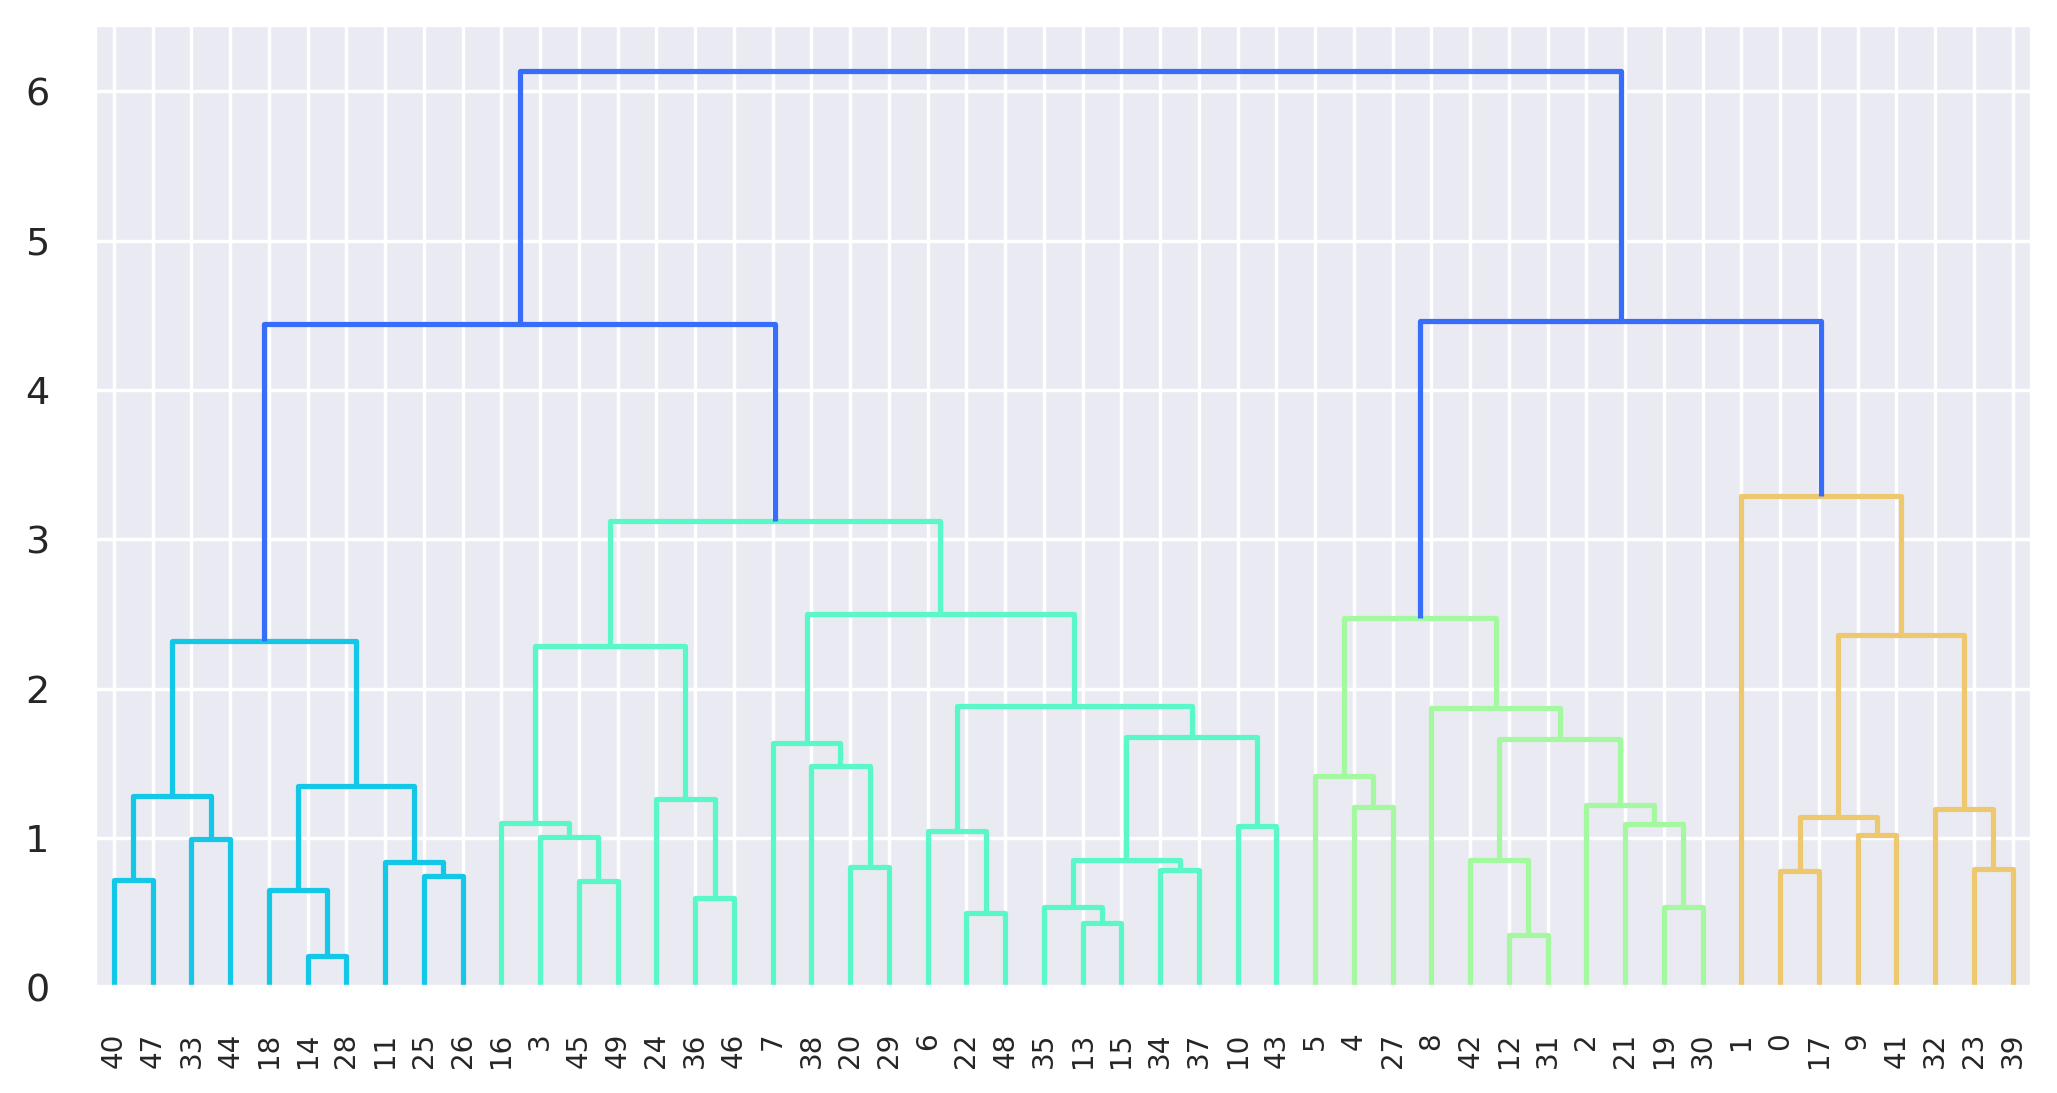

In [76]:
lk = hierarchy.linkage(x,method='complete')
dendro = hierarchy.dendrogram(lk)

In [77]:
hc = AgglomerativeClustering(n_clusters=2)
y = hc.fit_predict(x)
y

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [78]:
data['y'] = y
data

,Murder,Assault,UrbanPop,Rape,y
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [79]:
data[data['y']==0]

,Murder,Assault,UrbanPop,Rape,y
3,8.8,190,50,19.5,0
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
10,5.3,46,83,20.2,0
11,2.6,120,54,14.2,0
13,7.2,113,65,21.0,0
14,2.2,56,57,11.3,0
15,6.0,115,66,18.0,0
16,9.7,109,52,16.3,0
18,2.1,83,51,7.8,0


In [80]:
data.groupby('y').agg('mean')

,Murder,Assault,UrbanPop,Rape
y,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,29.215789


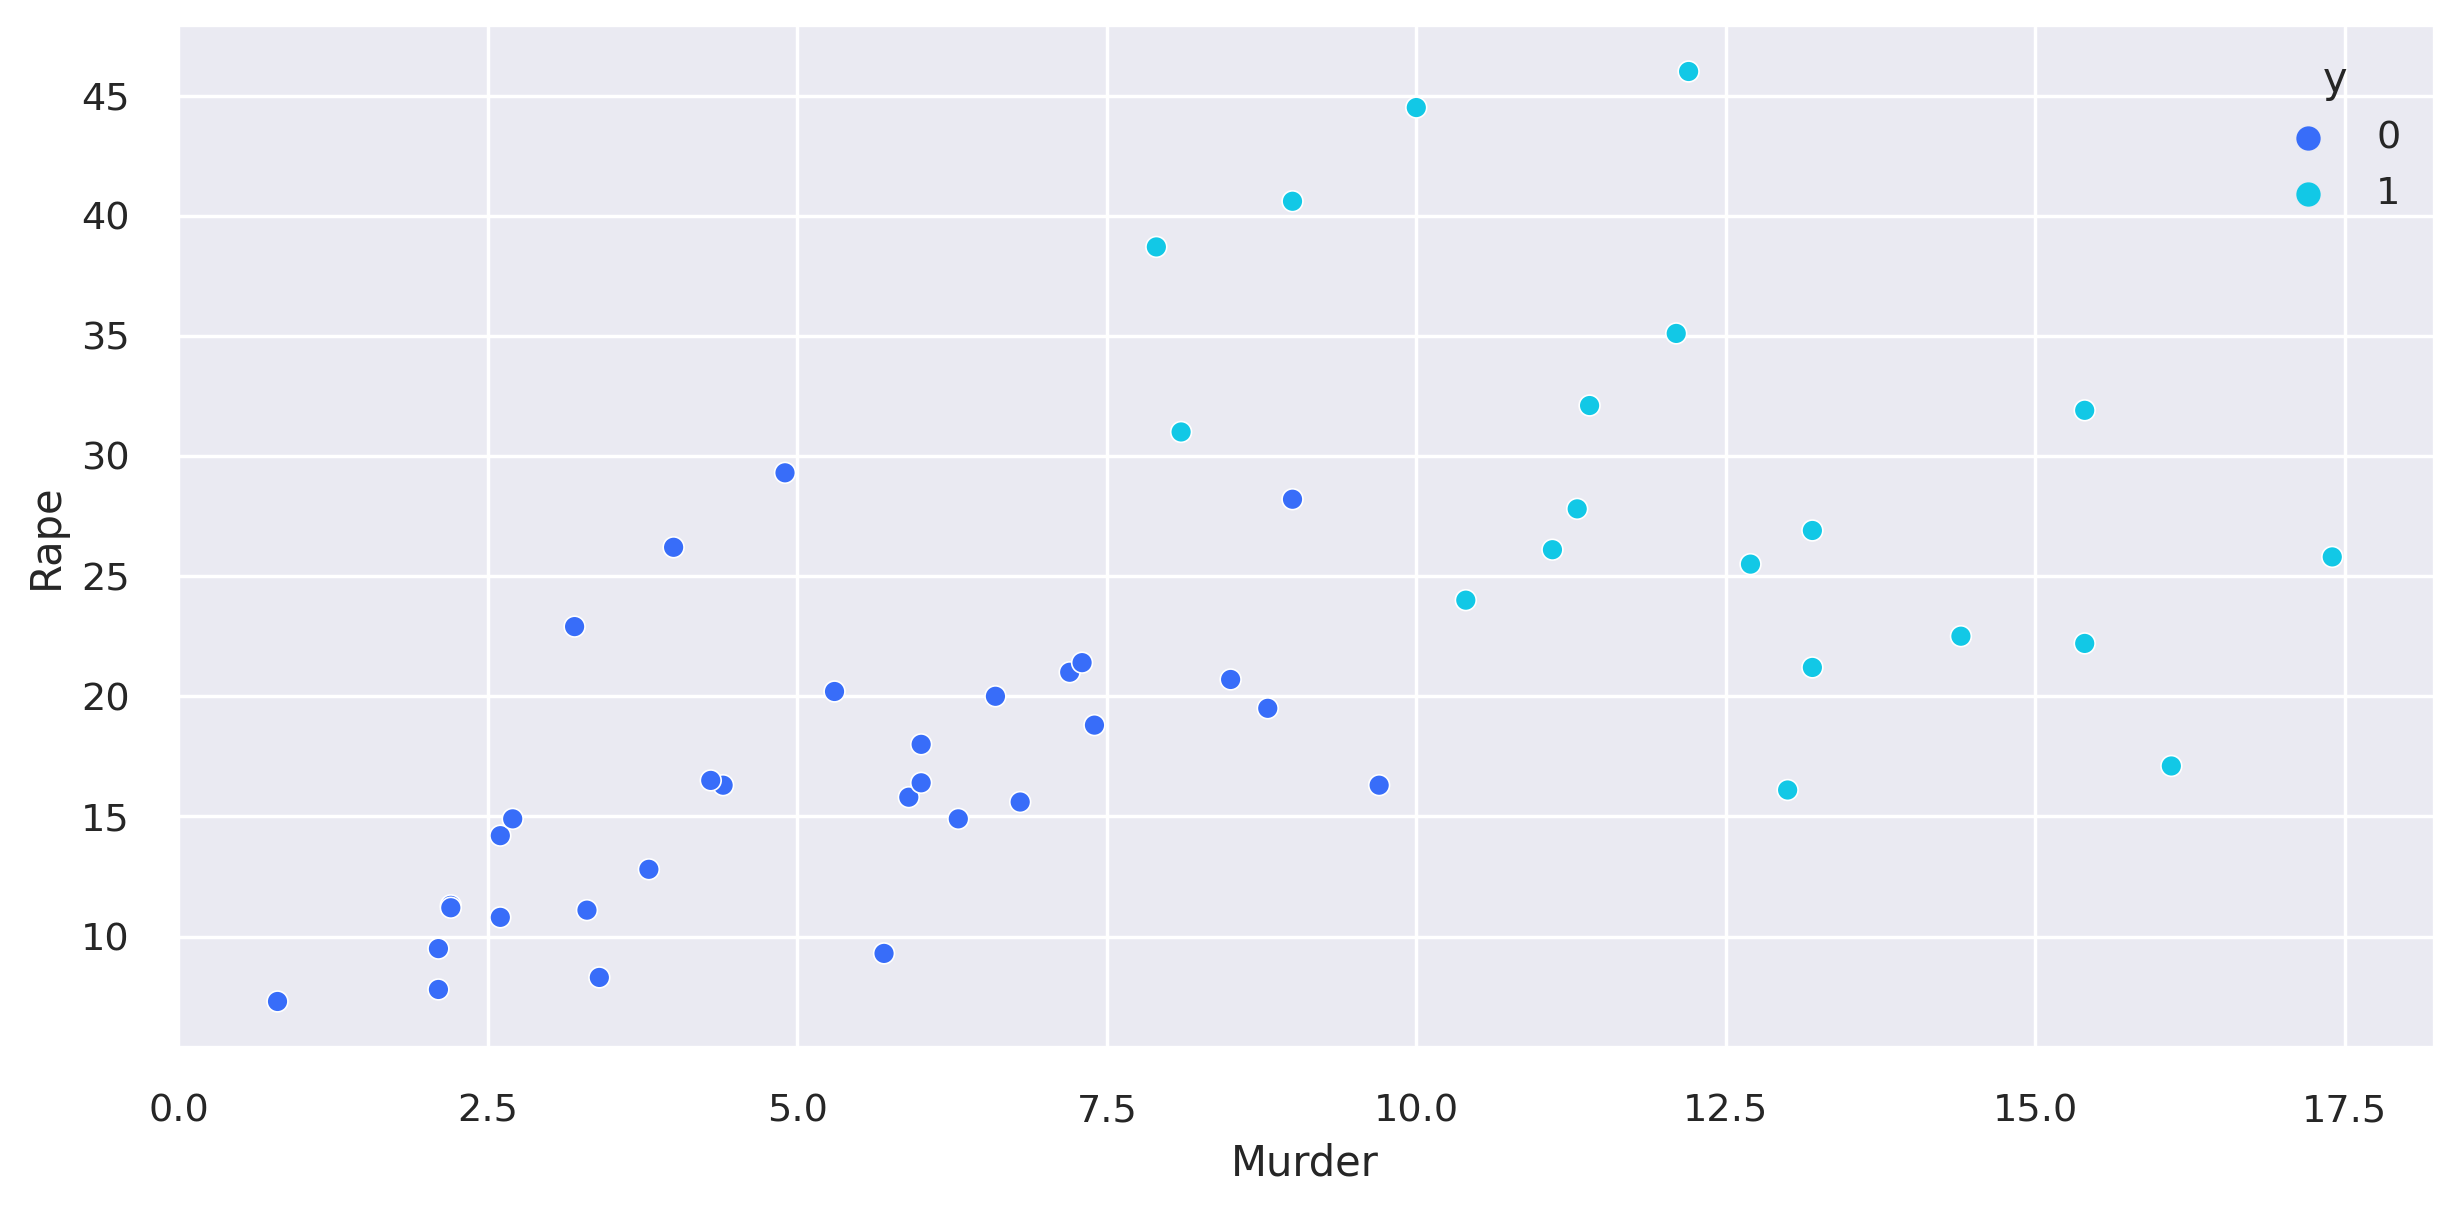

In [81]:
sns.scatterplot(x=data['Murder'],y=data['Rape'],hue = data['y'])
plt.xlabel = 'Murder'
plt.ylabel = 'Rape'
plt.tight_layout()
plt.show()

In [82]:
data

,Murder,Assault,UrbanPop,Rape,y
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,0
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [83]:
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [84]:
#KMeans Clustering And Model Building

In [85]:
km = KMeans()
y = km.fit_predict(x)

In [86]:
#Cluster Centers
km.cluster_centers_

array([[ 0.44344101,  0.88775677,  1.2417461 ,  2.21463743],
       [-1.16843924, -1.14052421, -0.37498964, -0.90219046],
       [ 0.83513693,  1.2109888 ,  0.60590758,  1.04148307],
       [-0.27552716, -0.21796613,  0.2259553 ,  0.11398411],
       [-1.12901195, -1.2383019 , -1.62883218, -1.24586837],
       [ 0.00858123, -0.34557544, -0.82279055, -0.4618082 ],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [-0.7029322 , -0.57371376,  1.13872696, -0.556561  ]])

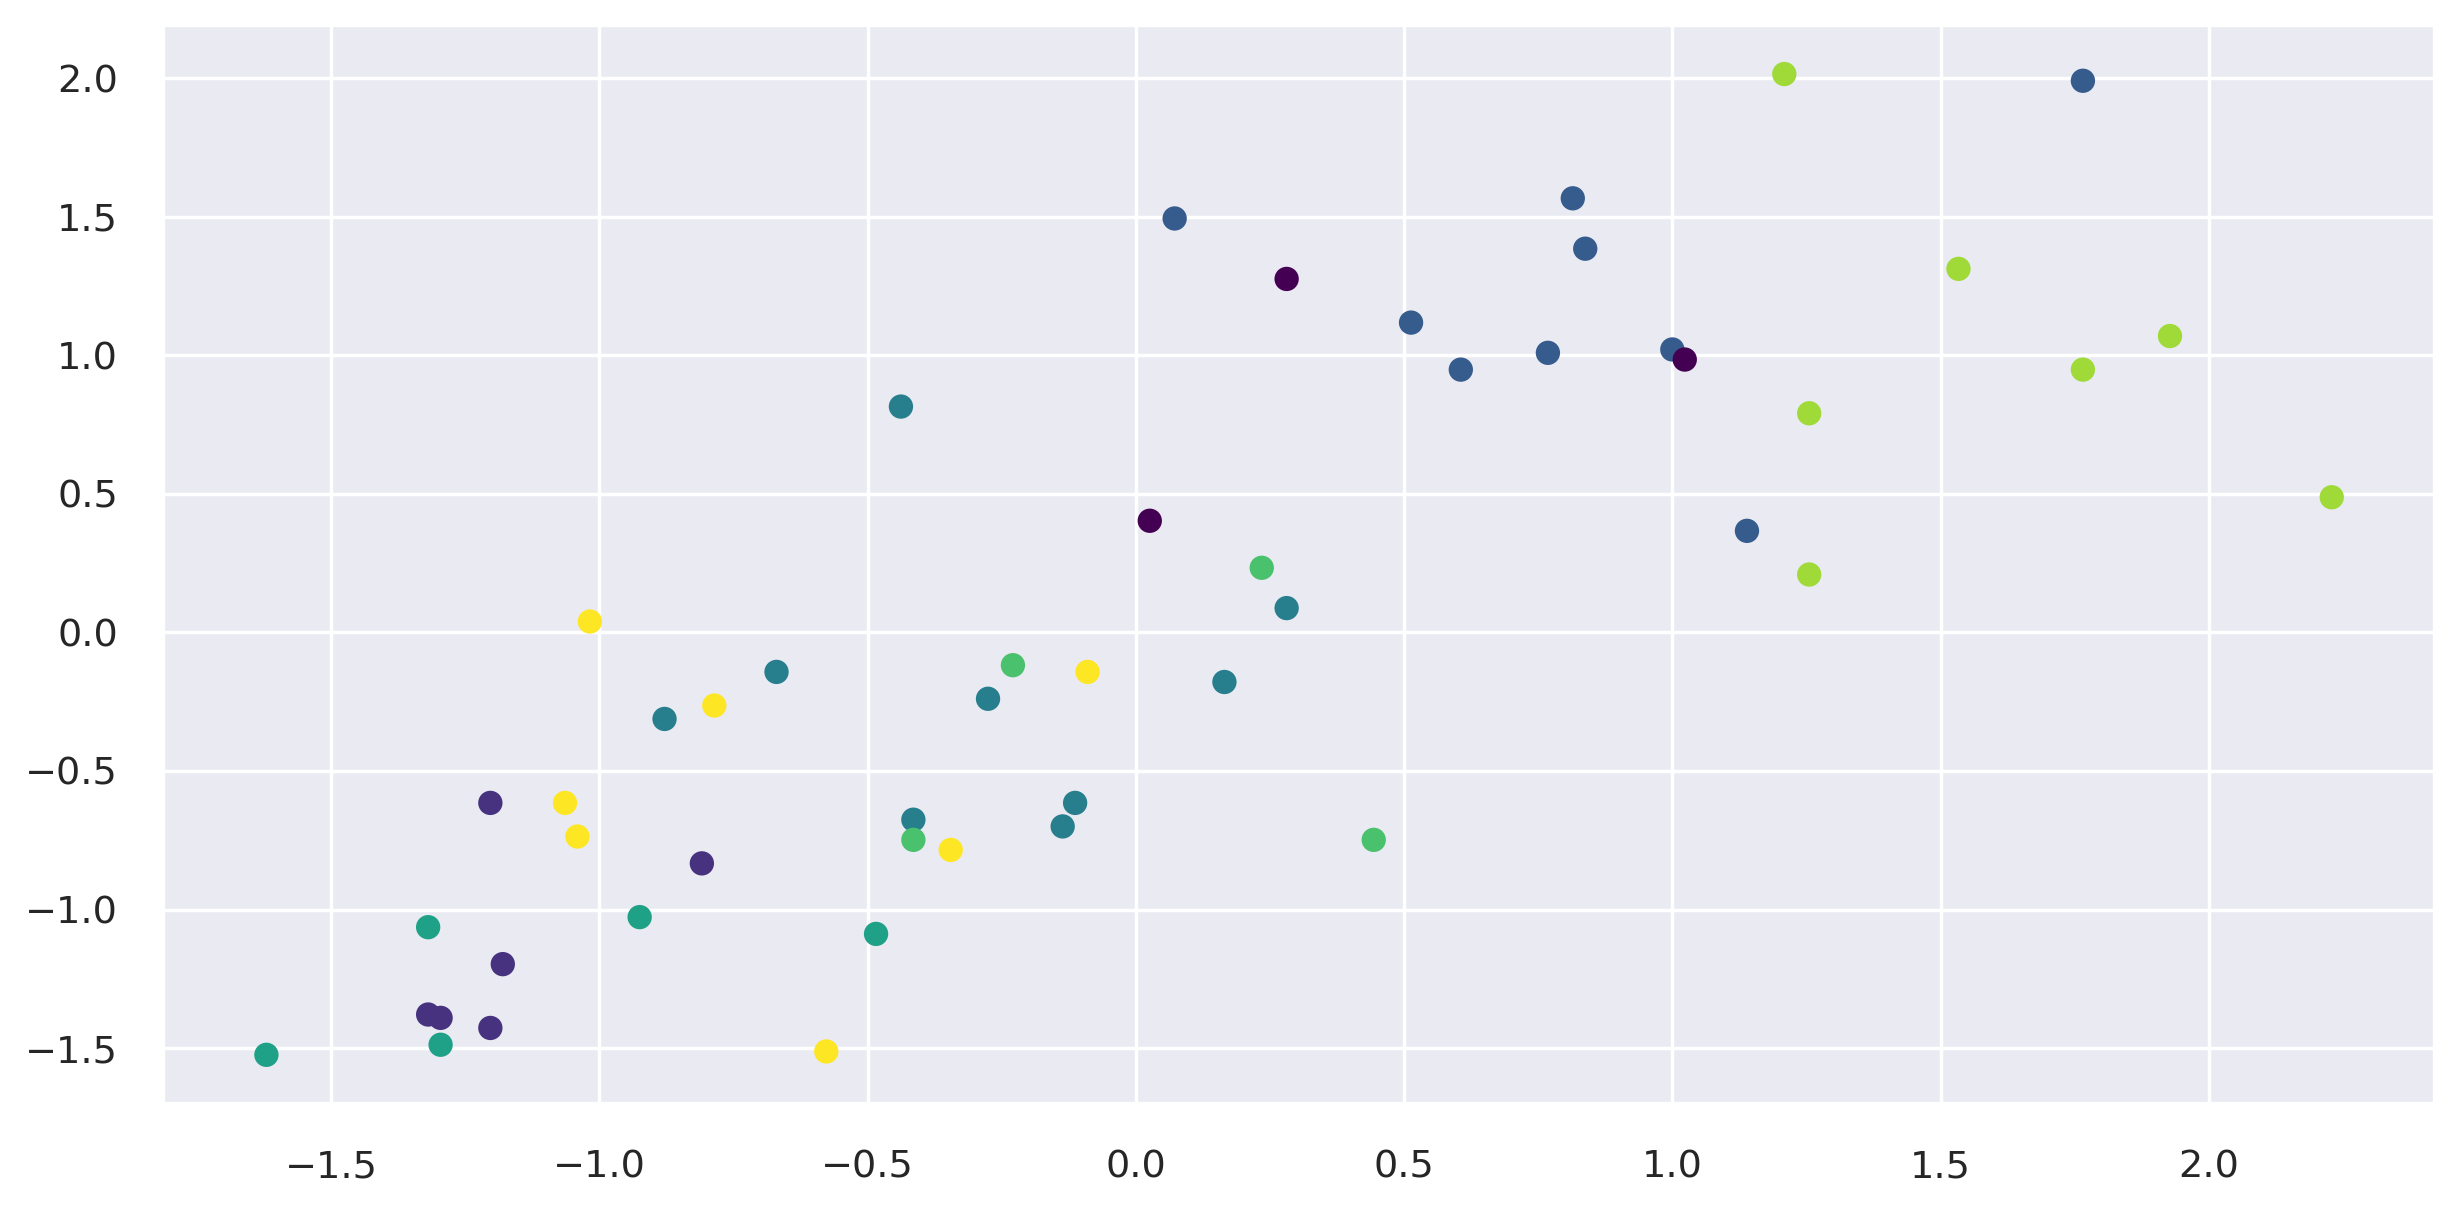

In [87]:
#Visualize the clusters
plt.scatter(x[:,0],x[:,1],c=y,cmap='viridis')
plt.tight_layout()
plt.show()

In [88]:
#silhouette score
silhouette_score(x,y)

0.2501241218014886

In [89]:
#Elbow graph
wcss = []
for i in range(1,20):
  km = KMeans(n_clusters=i)
  km.fit_predict(x)
  wcss.append(km.inertia_)

In [90]:
wcss

[200.00000000000003,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 49.94306447936139,
 45.68025705490913,
 40.03456443760511,
 37.02022916332752,
 32.25843105535322,
 28.37736893065206,
 25.06421505022596,
 22.39391952153778,
 20.85127454636089,
 20.39247516516781,
 18.038864974545447,
 16.62659159052059,
 16.20652651060759,
 14.746481644374981,
 13.442381500611535]

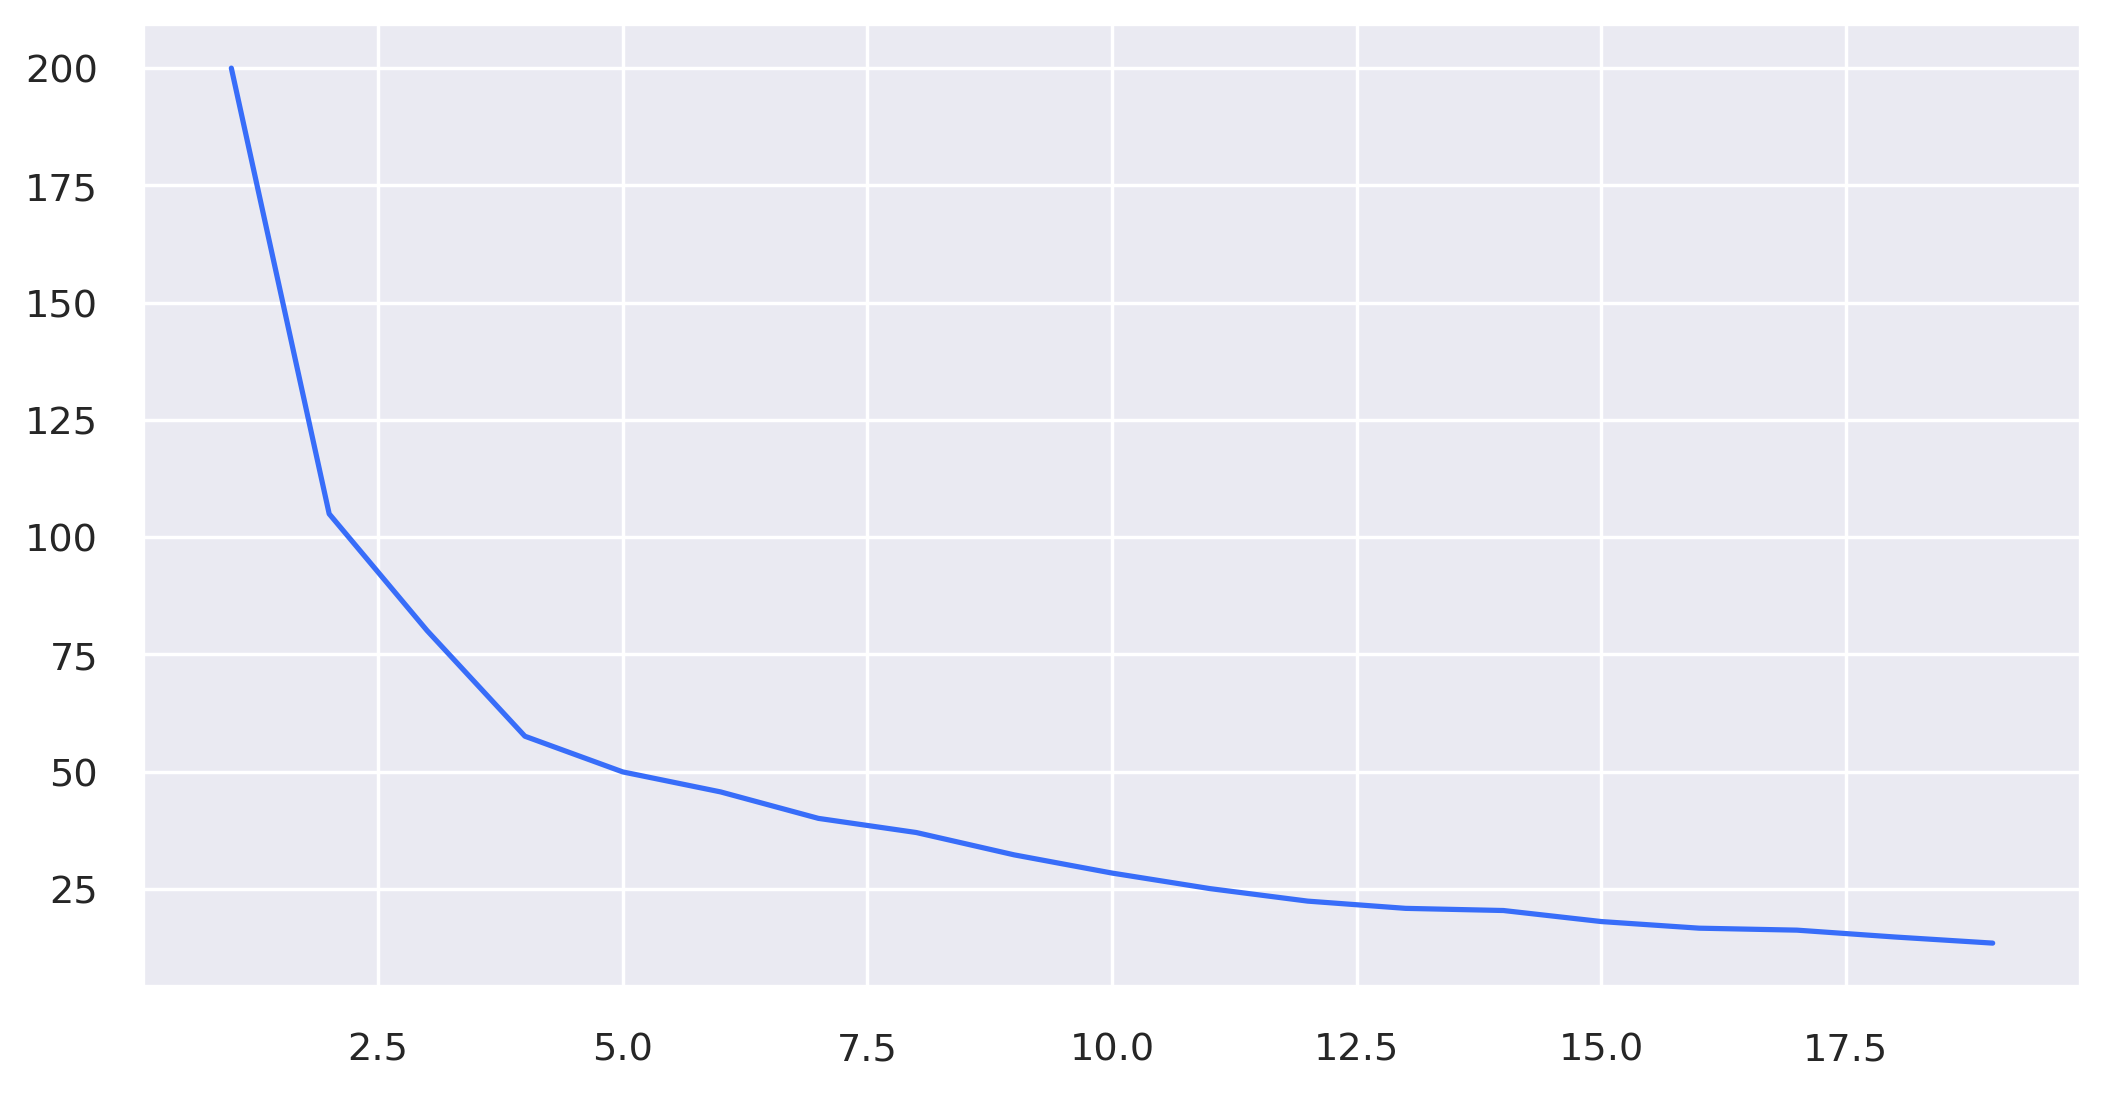

In [91]:
plt.plot(range(1,20),wcss)

In [92]:
#Final Model
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([4, 2, 2, 3, 2, 2, 0, 3, 2, 4, 0, 1, 2, 3, 1, 3, 3, 4, 1, 2, 0, 2,
       1, 4, 3, 1, 1, 2, 1, 0, 2, 2, 4, 1, 0, 3, 3, 0, 0, 4, 1, 4, 2, 0,
       1, 3, 0, 1, 1, 3], dtype=int32)

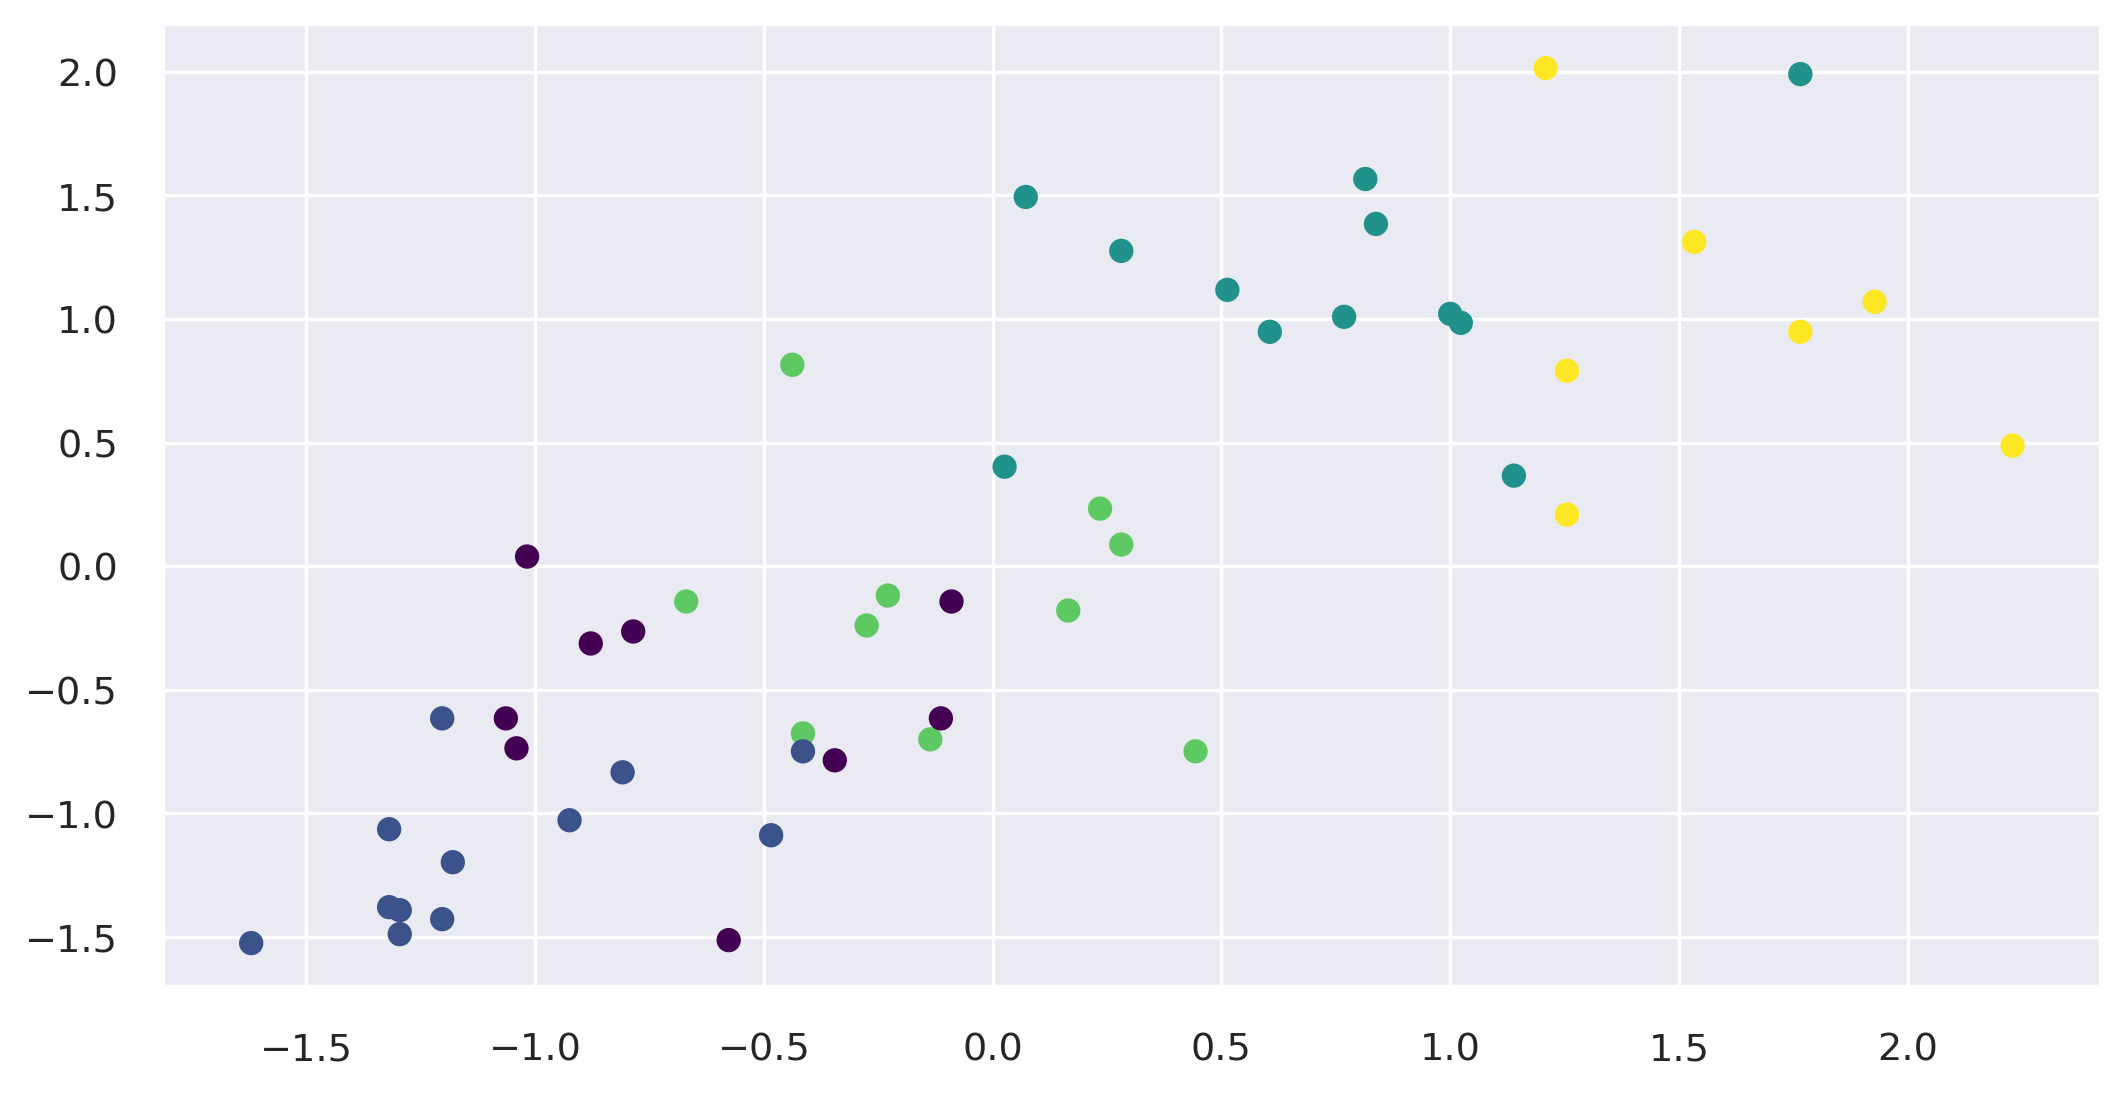

In [93]:
plt.scatter(x[:,0],x[:,1],c=ypred,cmap='viridis')

In [94]:
km.cluster_centers_

array([[-0.65691529, -0.54927896,  1.01687638, -0.37133511],
       [-1.08919812, -1.14860501, -0.93910247, -1.01363413],
       [ 0.73721295,  1.13018079,  0.76486721,  1.33477166],
       [-0.1039025 , -0.16678773, -0.15632323, -0.08541618],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ]])

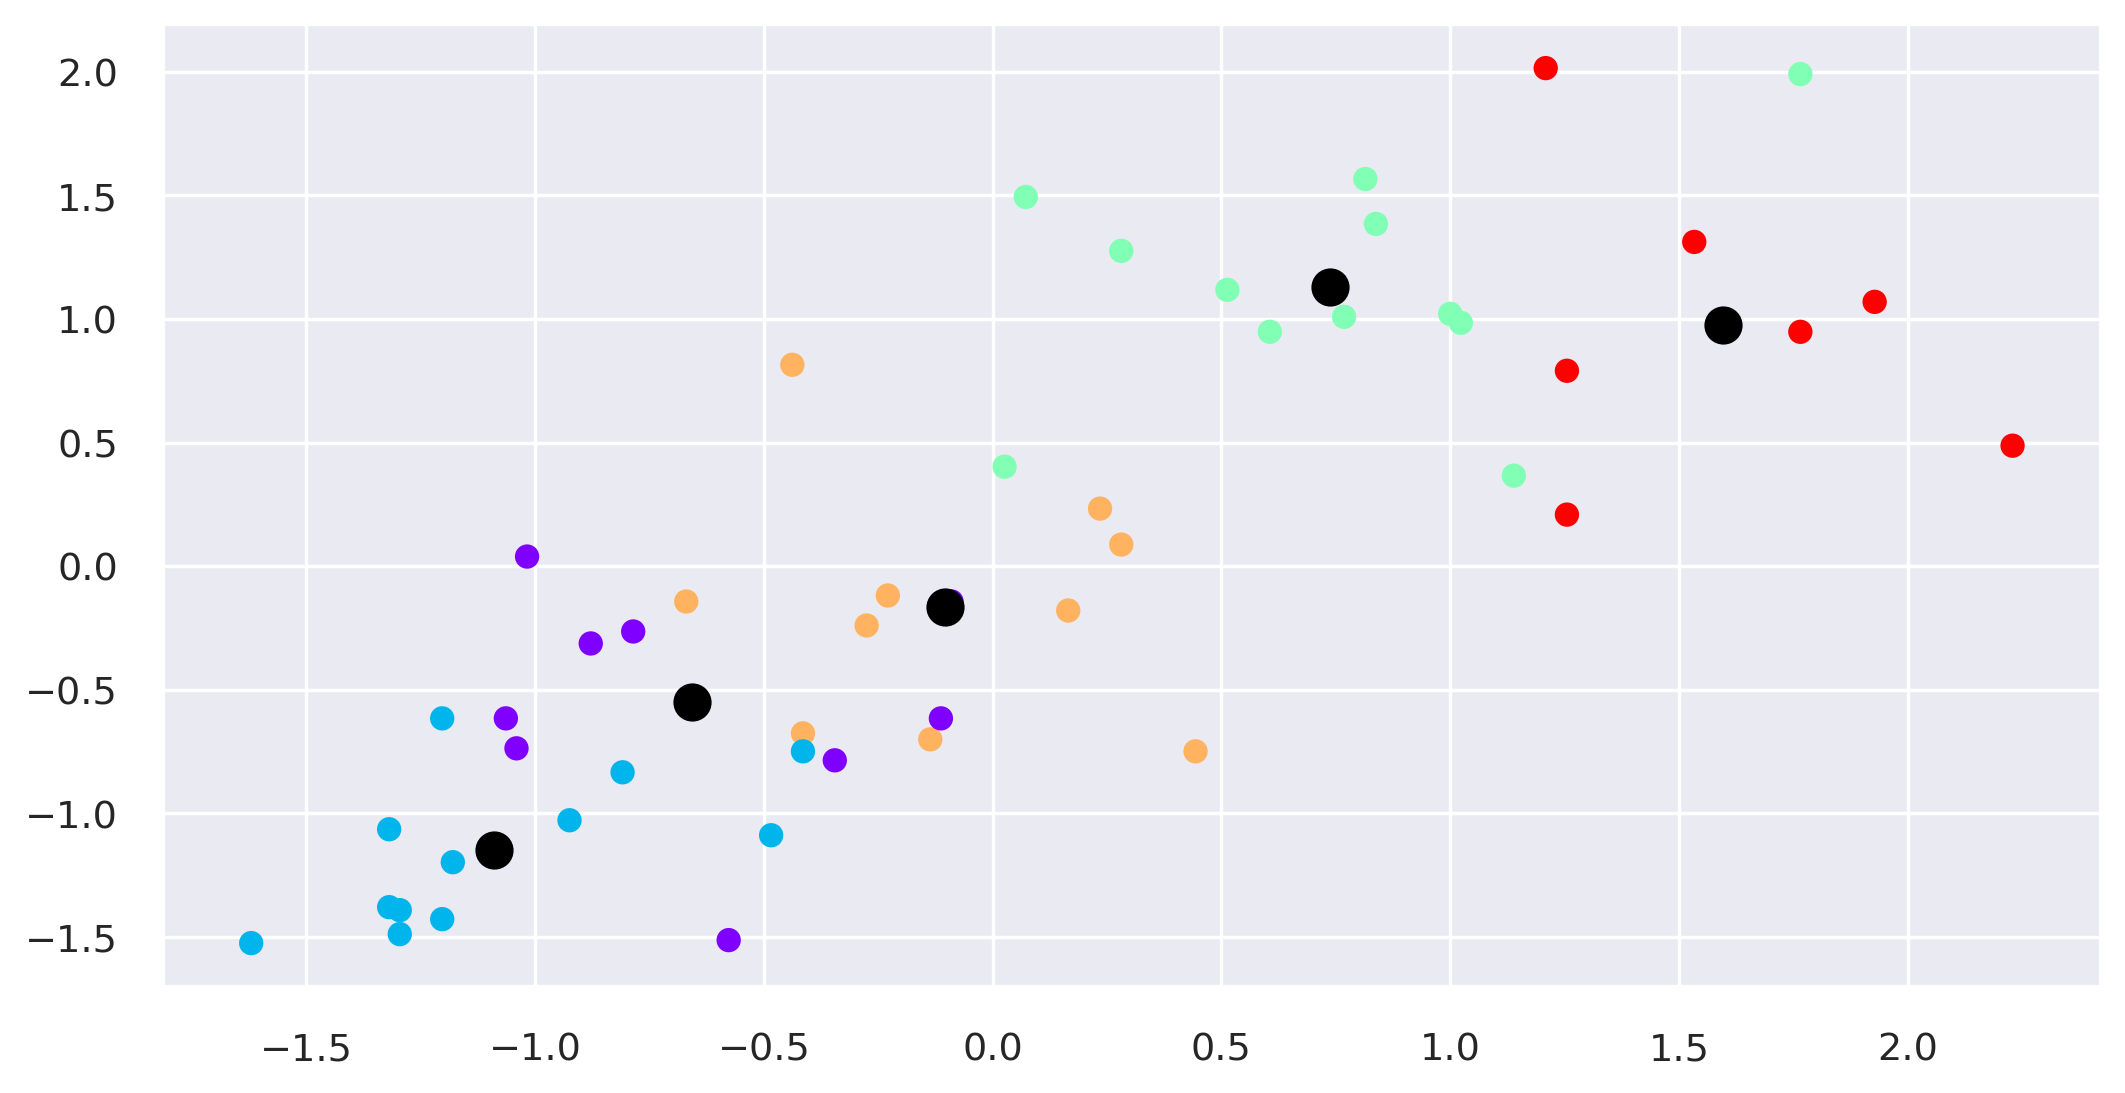

In [95]:
plt.scatter(x[:,0],x[:,1],c=ypred,cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',s=100)

In [96]:
silhouette_score(x,ypred)

0.3019745129711985

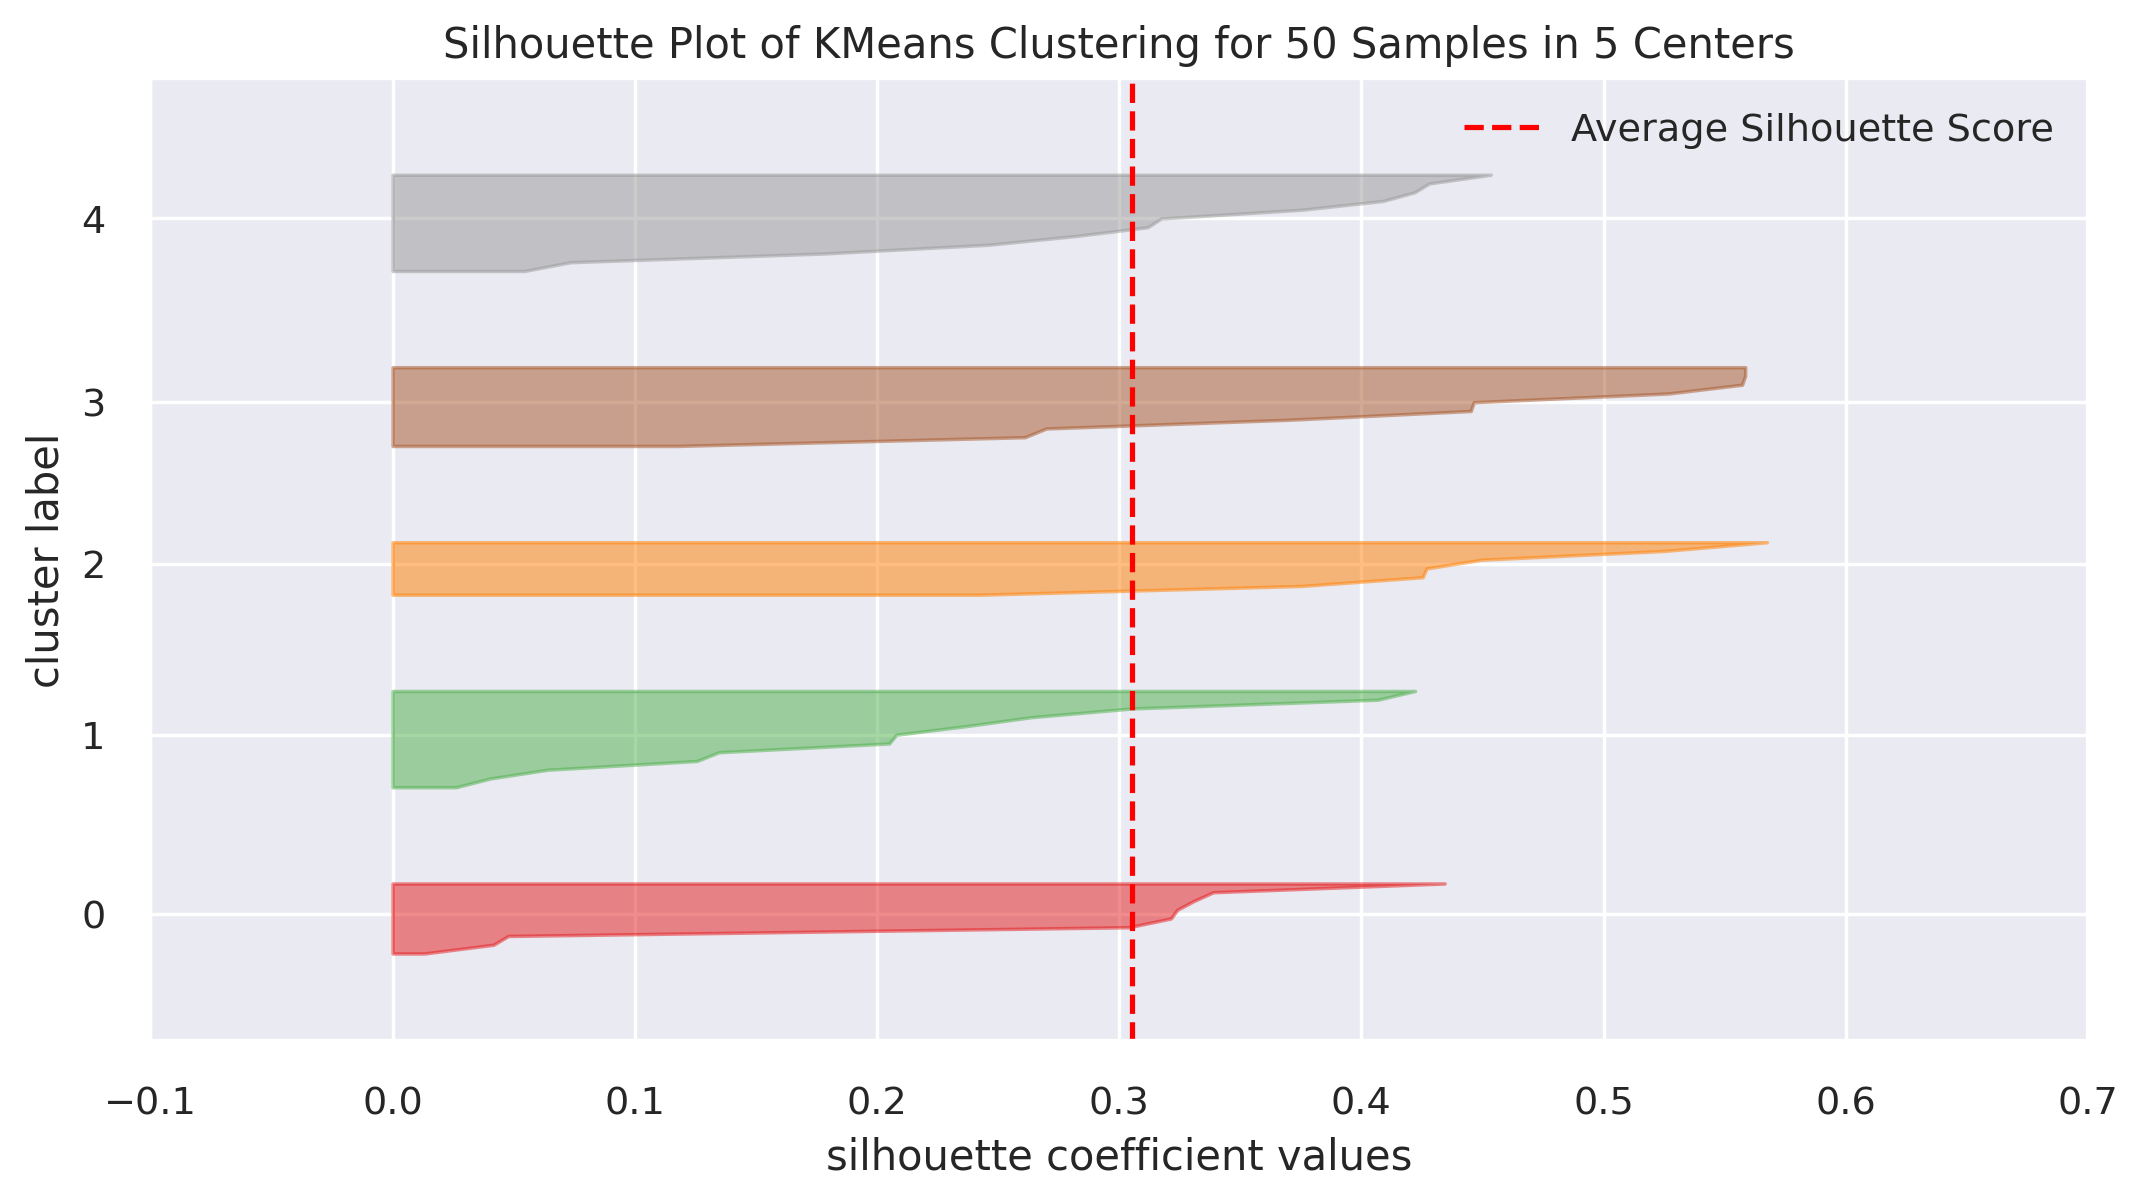

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 50 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [97]:
model = SilhouetteVisualizer(KMeans(n_clusters=5))
vis = model.fit(x)
vis.show()

In [98]:
sil_score = []
for i in range(2,20):
  km = KMeans(n_clusters=i)
  y = km.fit_predict(x)
  sil_score.append(silhouette_score(x,y))

In [99]:
sil_score

[0.4084890326217641,
 0.3110602770365059,
 0.3441080718209351,
 0.2892698909578641,
 0.31320289272968777,
 0.24431455308054295,
 0.2615260484549987,
 0.2542280247845078,
 0.2430385823073003,
 0.26526378675044554,
 0.24943220845706865,
 0.26076805113350016,
 0.24225329804104312,
 0.2235570776440416,
 0.235706367319051,
 0.23083642200789437,
 0.24462100514262006,
 0.2095785930659411]

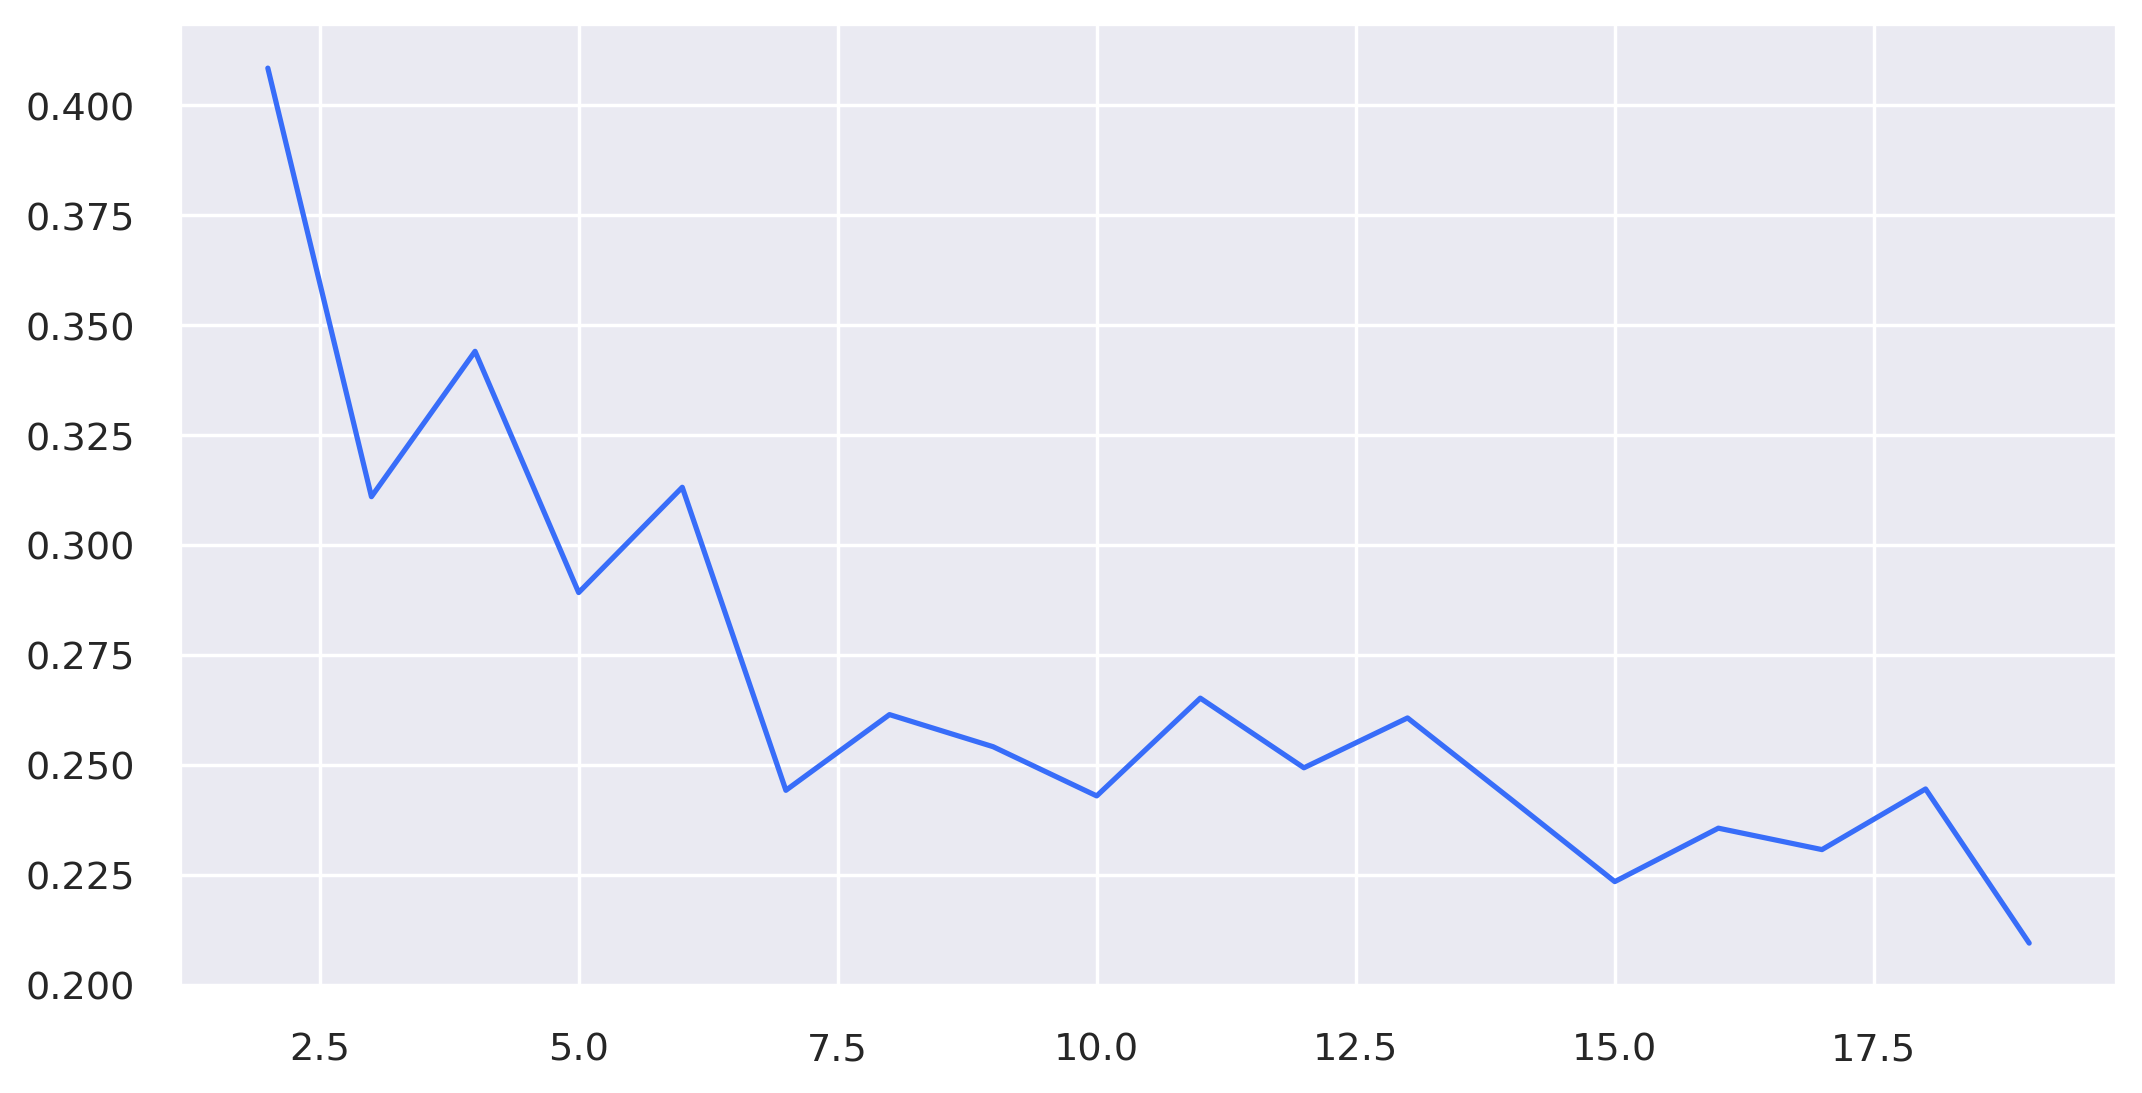

In [100]:
plt.plot(range(2,20),sil_score)

In [101]:
df['Murder'] = ypred
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,4,236,58,21.2
1,Alaska,2,263,48,44.5
2,Arizona,2,294,80,31.0
3,Arkansas,3,190,50,19.5
4,California,2,276,91,40.6
5,Colorado,2,204,78,38.7
6,Connecticut,0,110,77,11.1
7,Delaware,3,238,72,15.8
8,Florida,2,335,80,31.9
9,Georgia,4,211,60,25.8


In [102]:
df.groupby('Murder').agg('mean')

,Assault,UrbanPop,Rape
Murder,,,
0,125.444444,80.111111,17.788889
1,76.000000,52.083333,11.833333
2,264.000000,76.500000,33.608333
3,157.000000,63.300000,20.440000
4,251.285714,54.285714,21.685714


In [103]:
#DBSCAN

In [104]:
db = DBSCAN()
y = db.fit_predict(x)

In [105]:
#Nearest Neighbors
neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)

In [106]:
pd.DataFrame(d)

,0,1,2
0,0.0,0.780062,0.849285
1,0.0,2.078984,2.136971
2,0.0,1.048220,1.083411
3,0.0,1.001328,1.007227
4,0.0,1.208977,1.300691
5,0.0,1.248863,1.300691
6,0.0,0.881004,0.956432
7,0.0,1.192276,1.271401
8,0.0,1.309743,1.349263
9,0.0,0.867978,1.022502


In [107]:
dist = np.sort(d[:,1],axis=0)
dist

array([0.2079438 , 0.2079438 , 0.35377437, 0.35377437, 0.43312429,
       0.43312429, 0.49909939, 0.49909939, 0.50466926, 0.52515083,
       0.53326883, 0.54082482, 0.54082482, 0.55122406, 0.57035779,
       0.58411812, 0.59956023, 0.59956023, 0.65497312, 0.70111326,
       0.71097658, 0.71809843, 0.71809843, 0.73797792, 0.74649625,
       0.75913104, 0.78006247, 0.78006247, 0.79455301, 0.79455301,
       0.80586349, 0.80586349, 0.83250223, 0.84928467, 0.8610239 ,
       0.86797806, 0.88100359, 0.95367898, 0.98866758, 0.99246041,
       1.0013278 , 1.0482199 , 1.0582674 , 1.08184506, 1.19227586,
       1.20897691, 1.20897691, 1.24886253, 1.30974334, 2.07898369])

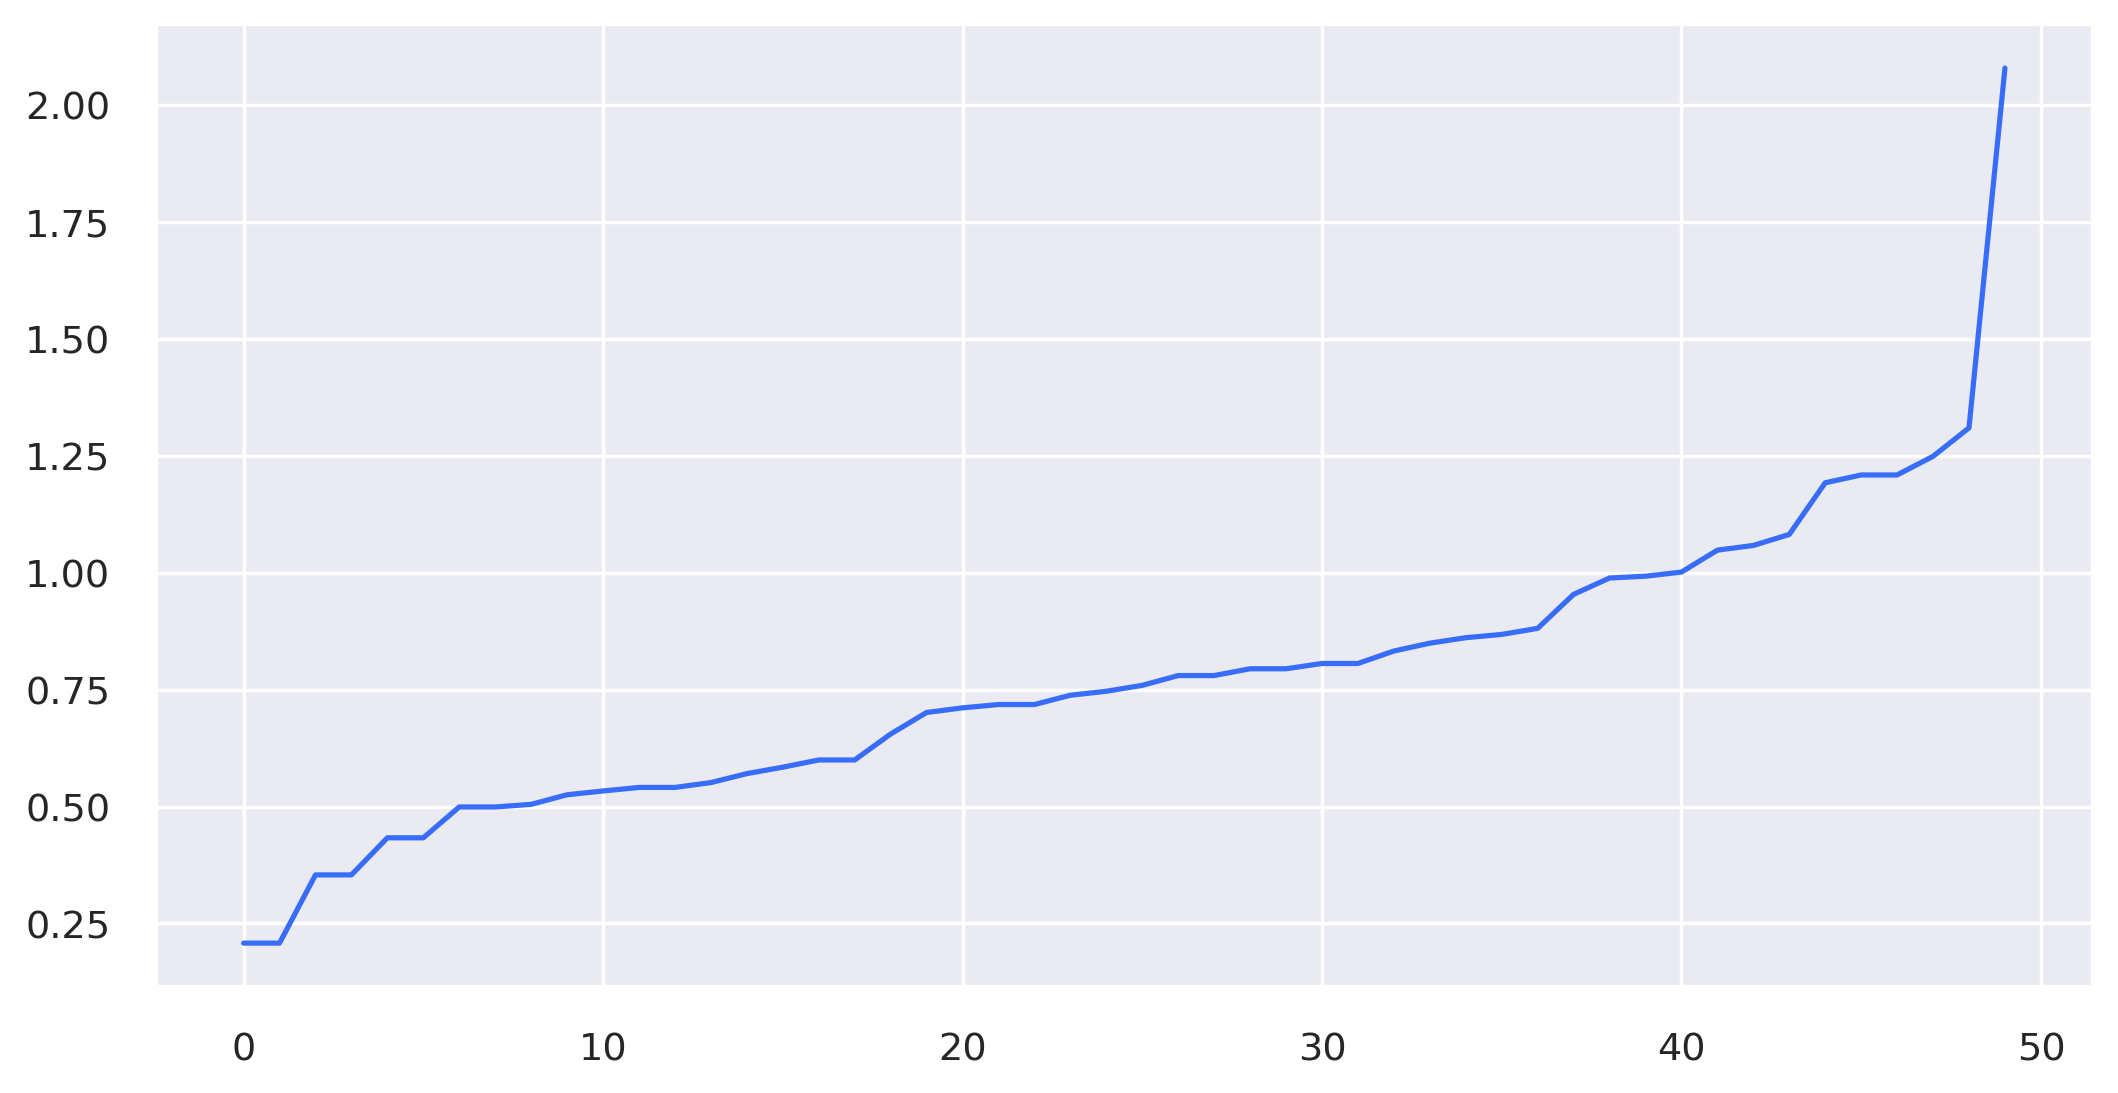

In [108]:
plt.plot(dist)

In [109]:
db = DBSCAN(eps=2,min_samples=3)
ypred = db.fit_predict(x)
ypred

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [110]:
silhouette_score(x,ypred)

0.23455598753159795

In [111]:
df['Rape'] = ypred

In [112]:
df[df['Rape']==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
1,Alaska,2,263,48,-1


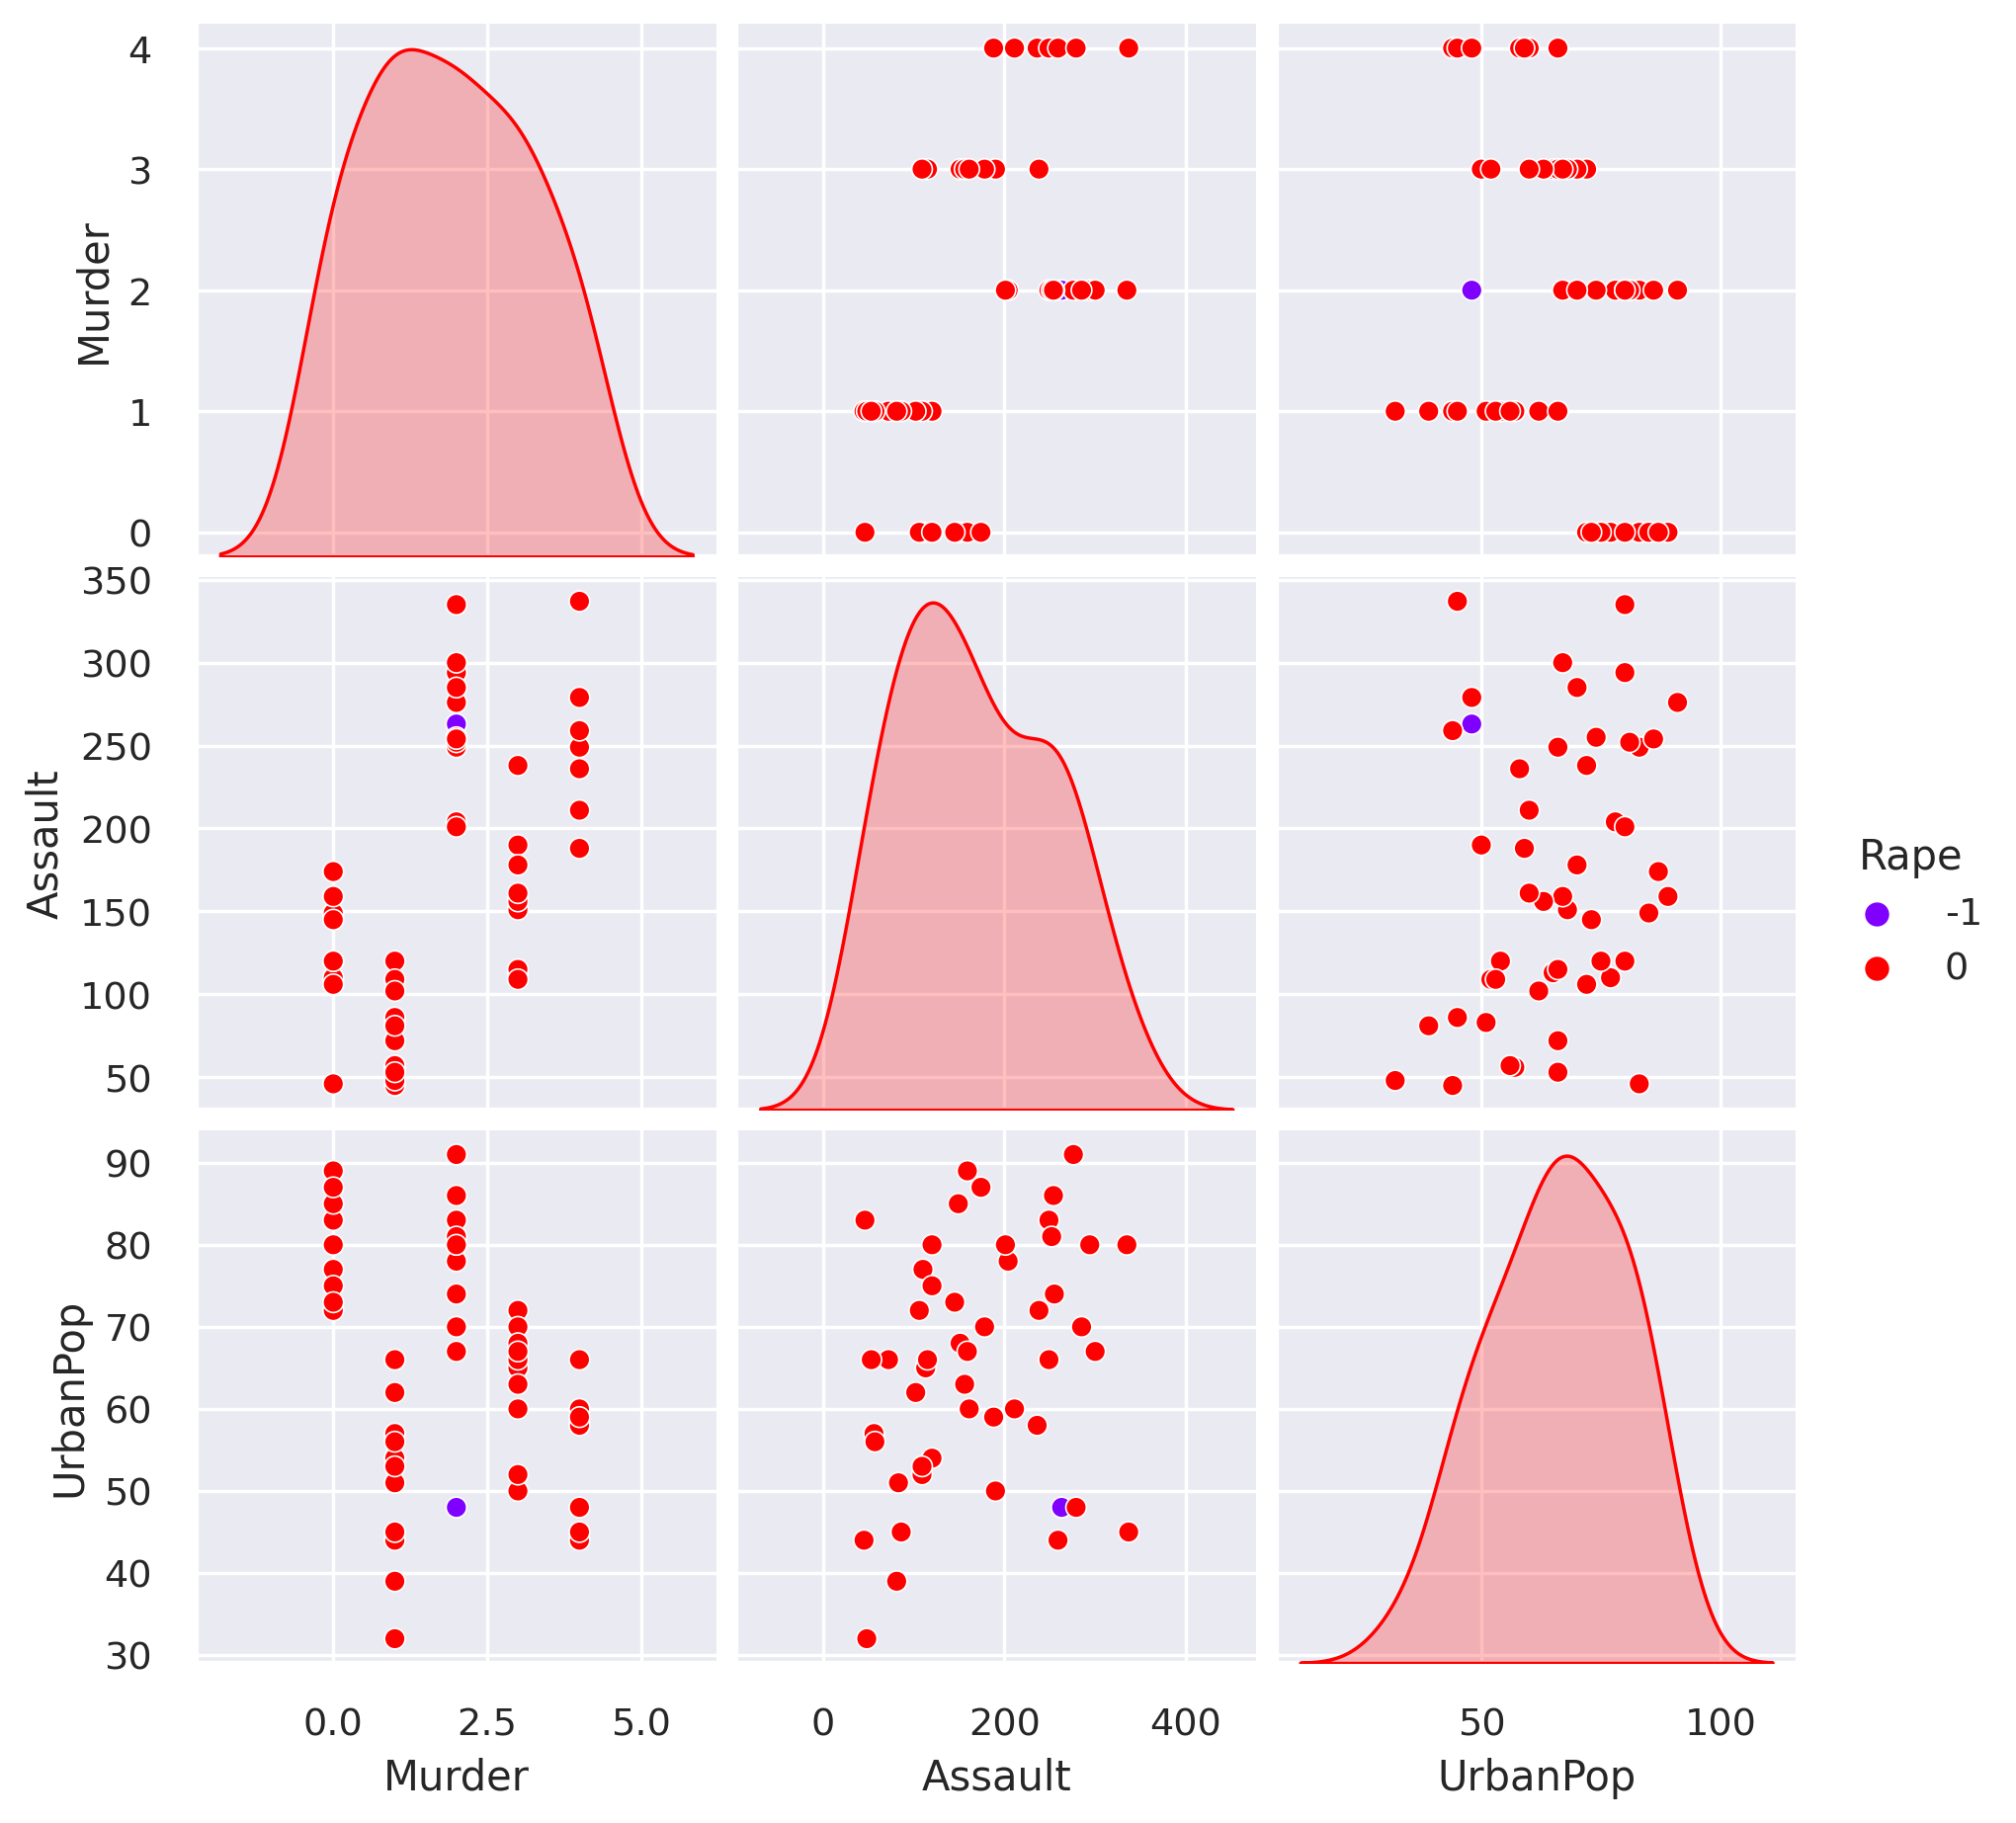

In [115]:
sns.pairplot(df,hue='Rape',palette='rainbow')